<div style="color: red;"> Damien TANNEAU, e1801969, M1 IM, 2022-2023</div>

# Librairies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Imports des données

In [3]:
df = pd.read_excel("donnees_pneu.xlsx")
df.head()

,Cat de Pneu,Type de Pneu,Age en semaine,Km mensuel,Pourcentage Utilisation (%),basse vitesse(%),Moderee (%),Haute Vitesse (%),Nombre Moyen de Freinage d'urgence /j,Score de conduite
0,Abimé,Hivers,24,2953.70,72.96,19.22,6.63,0.19,10.700000,5.5
1,Usure Normale,Ete,25,1910.00,83.28,11.97,3.55,0.20,13.272727,4.5
2,Usure Normale,Hivers,33,1997.00,88.01,8.74,1.51,0.74,15.496667,5.0
3,Très abimé,Hivers,39,2851.91,93.24,3.73,2.50,0.53,12.142857,5.0
4,Usure Normale,Ete,29,1988.00,71.76,22.44,5.67,0.13,9.000000,4.5


# Analyse des données

Chercons à présent à en savoir plus sur les données.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Cat de Pneu                            81 non-null     object 
 1   Type de Pneu                           81 non-null     object 
 2   Age en semaine                         81 non-null     int64  
 3   Km mensuel                             81 non-null     float64
 4   Pourcentage Utilisation (%)            81 non-null     float64
 5   basse vitesse(%)                       81 non-null     float64
 6   Moderee (%)                            81 non-null     float64
 7   Haute Vitesse (%)                      81 non-null     float64
 8   Nombre Moyen de Freinage d'urgence /j  81 non-null     float64
 9   Score de conduite                      81 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 6.5+ KB


Dressons-en quelques statistiques simples pour mieux les cerner.

In [5]:
df.describe()

,Age en semaine,Km mensuel,Pourcentage Utilisation (%),basse vitesse(%),Moderee (%),Haute Vitesse (%),Nombre Moyen de Freinage d'urgence /j,Score de conduite
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,37.864198,2461.644979,74.906790,17.352469,6.199877,1.102547,13.769690,5.327160
std,13.428285,585.754220,10.339799,8.838691,3.548110,2.020938,5.209177,1.081551
min,21.000000,1241.000000,45.120000,0.840000,1.510000,0.000000,4.000000,3.000000
25%,24.000000,1999.183333,68.580000,11.150000,3.580000,0.070000,9.642857,4.500000
50%,35.000000,2358.800000,75.610000,16.190000,5.130000,0.270000,13.200000,5.500000
75%,49.000000,2851.910000,82.780000,22.280000,7.680000,0.860000,16.400000,6.000000
max,72.000000,4066.900000,93.240000,43.220000,18.290000,10.970000,29.500000,7.500000


In [6]:
df.select_dtypes(include='number').corr()

,Age en semaine,Km mensuel,Pourcentage Utilisation (%),basse vitesse(%),Moderee (%),Haute Vitesse (%),Nombre Moyen de Freinage d'urgence /j,Score de conduite
Age en semaine,1.000000,0.088260,-0.062481,0.051582,0.080538,-0.058360,0.263386,0.277655
Km mensuel,0.088260,1.000000,-0.203481,-0.031995,0.459728,0.427956,-0.080134,-0.125101
Pourcentage Utilisation (%),-0.062481,-0.203481,1.000000,-0.876918,-0.627872,-0.223818,0.009950,-0.000162
basse vitesse(%),0.051582,-0.031995,-0.876918,1.000000,0.231765,-0.157462,-0.073271,-0.013194
Moderee (%),0.080538,0.459728,-0.627872,0.231765,1.000000,0.504004,0.019072,-0.027091
Haute Vitesse (%),-0.058360,0.427956,-0.223818,-0.157462,0.504004,1.000000,-0.016297,0.063502
Nombre Moyen de Freinage d'urgence /j,0.263386,-0.080134,0.009950,-0.073271,0.019072,-0.016297,1.000000,0.370787
Score de conduite,0.277655,-0.125101,-0.000162,-0.013194,-0.027091,0.063502,0.370787,1.000000


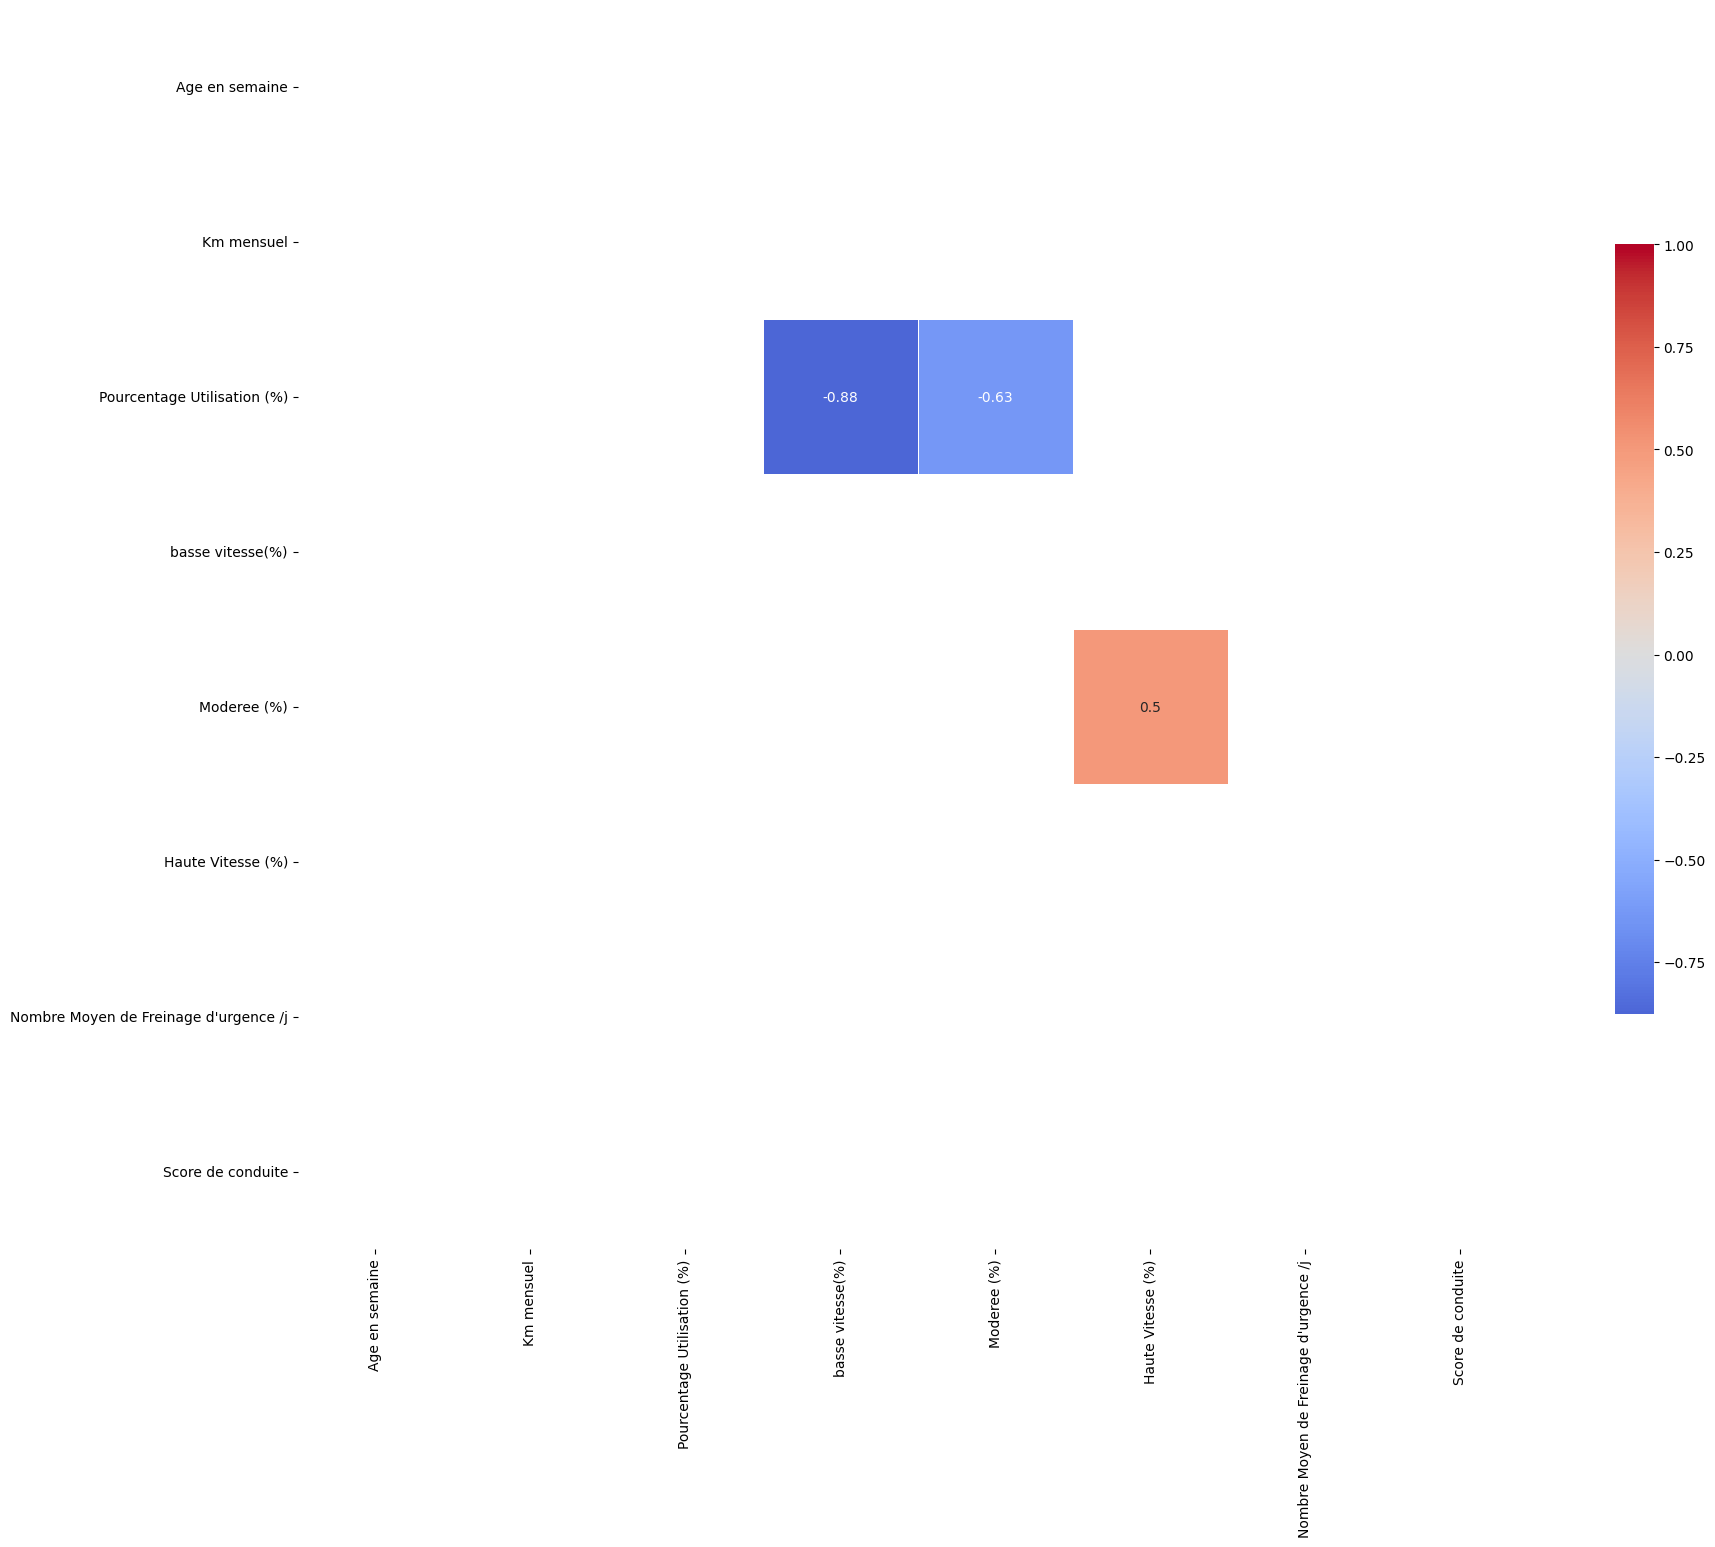

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

corr_matrix = df.select_dtypes(include='number').corr()
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
corr_matrix = corr_matrix.mask(mask | (corr_matrix.abs() < 0.5))
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [13]:
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Prepare the data for training
X = df.drop('Cat de Pneu', axis=1)
y = df['Cat de Pneu']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X)

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_encoded, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_encoded.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
top_features = featureScores.nlargest(5,'Score')  

print(top_features)

# Use only top features for training
X_encoded_top_features = X_encoded[top_features['Specs'].values]

# Label encoding for target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert labels to categorical
y_categorical = to_categorical(y_encoded)

# Apply K-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Define the larger model architecture
inputs = Input(shape=(X_encoded_top_features.shape[1],))
x = Dense(1024, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(inputs)
outputs = Dense(y_categorical.shape[1], activation='softmax')(x)

# Build the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Set up early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

for train_index, test_index in kf.split(X_encoded_top_features):
    X_train, X_test = X_encoded_top_features[train_index], X_encoded_top_features[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, callbacks=[es])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Accuracy: %.2f' % (accuracy*100))


                         Specs     Score
1                   Km mensuel  8.487158
3             basse vitesse(%)  6.289909
2  Pourcentage Utilisation (%)  5.433319
7            Score de conduite  2.213825
8             Type de Pneu_Ete  1.311713


KeyError: "None of [Index([ 1,  2,  3,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 19, 20, 21, 23,\n       24, 25, 26, 27, 29, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47,\n       48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,\n       69, 71, 72, 74, 75, 76, 77, 78, 79, 80],\n      dtype='int64')] are in the [columns]"